<a href="https://colab.research.google.com/github/JudithHM/Proyecto_final_SP_IA/blob/main/Proyecto_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto IA
Nombre

1.   Ana Hérnandez - 22000176
2.   Lourdes Najarro - 22000795
3.   Carmen Corzo - 22000841

#Preparaciones


In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import RandomOverSampler  # Para oversampling
import seaborn as sns

#Dataset Preparations


In [ ]:
from ucimlrepo import fetch_ucirepo

# Fetch the Car Evaluation dataset from UCI repository
car_evaluation = fetch_ucirepo(id=19)

# Acceder a los datos (features y target)
X = car_evaluation.data.features
y = car_evaluation.data.targets

# Mostrar los metadatos del dataset
print(car_evaluation.metadata)

# Mostrar la información de las variables
print(car_evaluation.variables)

{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'ID': 249, 'type': 'NATIVE', 'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'venue': '8th Intl Workshop on Expert Systems and their Applications, 

In [ ]:
# Primeros registros
print("\nPrimeras filas del dataset (X):")
print(X.head())
print("\nPrimeras filas del target (y):")
print(y.head())


Primeras filas del dataset (X):
  buying  maint doors persons lug_boot safety
0  vhigh  vhigh     2       2    small    low
1  vhigh  vhigh     2       2    small    med
2  vhigh  vhigh     2       2    small   high
3  vhigh  vhigh     2       2      med    low
4  vhigh  vhigh     2       2      med    med

Primeras filas del target (y):
   class
0  unacc
1  unacc
2  unacc
3  unacc
4  unacc


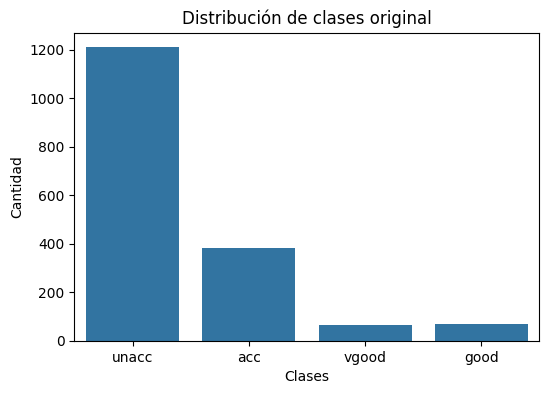

In [ ]:
# Distribución original de clases
plt.figure(figsize=(6, 4))
sns.countplot(x=y.values.ravel())
plt.title("Distribución de clases original")
plt.xlabel("Clases")
plt.ylabel("Cantidad")
plt.show()

In [ ]:
# Acceder a los datos (features y target)
X = car_evaluation.data.features
y = car_evaluation.data.targets
# Verificar los primeros registros de X y y
print(X.head())
print(y.head())

  buying  maint doors persons lug_boot safety
0  vhigh  vhigh     2       2    small    low
1  vhigh  vhigh     2       2    small    med
2  vhigh  vhigh     2       2    small   high
3  vhigh  vhigh     2       2      med    low
4  vhigh  vhigh     2       2      med    med
   class
0  unacc
1  unacc
2  unacc
3  unacc
4  unacc


#Construccion del modelo

In [ ]:
#Usando One-Hot Encoding.
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), X.columns)
    ]
)

# Crear un pipeline con el preprocesador
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Aplicar el preprocesador a los datos
X_encoded = pipeline.fit_transform(X)

# Ver columnas codificadas
ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat']
column_names = ohe.get_feature_names_out(X.columns)
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=column_names)
print("\nPrimeras filas del dataset codificado (One-Hot Encoding):")
print(X_encoded_df.head())


Primeras filas del dataset codificado (One-Hot Encoding):
   buying_high  buying_low  buying_med  buying_vhigh  maint_high  maint_low  \
0          0.0         0.0         0.0           1.0         0.0        0.0   
1          0.0         0.0         0.0           1.0         0.0        0.0   
2          0.0         0.0         0.0           1.0         0.0        0.0   
3          0.0         0.0         0.0           1.0         0.0        0.0   
4          0.0         0.0         0.0           1.0         0.0        0.0   

   maint_med  maint_vhigh  doors_2  doors_3  ...  doors_5more  persons_2  \
0        0.0          1.0      1.0      0.0  ...          0.0        1.0   
1        0.0          1.0      1.0      0.0  ...          0.0        1.0   
2        0.0          1.0      1.0      0.0  ...          0.0        1.0   
3        0.0          1.0      1.0      0.0  ...          0.0        1.0   
4        0.0          1.0      1.0      0.0  ...          0.0        1.0   

   person

In [ ]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

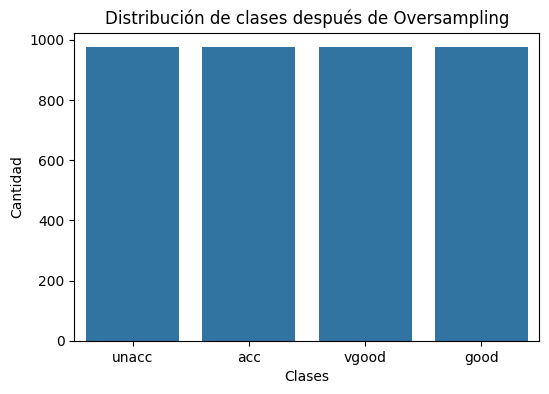

In [ ]:
# Oversampling
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Visualización después del balanceo
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled.values.ravel())
plt.title("Distribución de clases después de Oversampling")
plt.xlabel("Clases")
plt.ylabel("Cantidad")
plt.show()

#Modelos y comparación

In [ ]:
resultados = []

## Modelo 1: Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average="weighted")
resultados.append(("Random Forest", acc_rf, f1_rf))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


## Modelo 2: Red Neuronal (MLP con 3 capas ReLU)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(64, 32, 16), activation='relu', max_iter=1000, random_state=42)
mlp.fit(X_train_resampled, y_train_resampled)
y_pred_mlp = mlp.predict(X_test)
acc_mlp = accuracy_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp, average="weighted")
resultados.append(("MLP (3 capas ReLU)", acc_mlp, f1_mlp))

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Modelo 3: K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average="weighted")
resultados.append(("KNN", acc_knn, f1_knn))

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## Tabla comparativa

In [ ]:
df_resultados = pd.DataFrame(resultados, columns=["Arquitectura", "Accuracy", "F1-Score"])
mejor_modelo = df_resultados["F1-Score"].idxmax()
df_resultados.loc[mejor_modelo, ["Accuracy", "F1-Score"]] = "**" + df_resultados.loc[mejor_modelo, ["Accuracy", "F1-Score"]].astype(str) + "**"
print("\nComparación de modelos:")
print(df_resultados.to_markdown(index=False))


Comparación de modelos:
| Arquitectura       | Accuracy               | F1-Score               |
|:-------------------|:-----------------------|:-----------------------|
| Random Forest      | 0.9653179190751445     | 0.9672081760554202     |
| MLP (3 capas ReLU) | **0.9913294797687862** | **0.9914936056141486** |
| KNN                | 0.7283236994219653     | 0.7644177594982179     |


<ipython-input-14-41c7dbf444e0>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '**0.9913294797687862**' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_resultados.loc[mejor_modelo, ["Accuracy", "F1-Score"]] = "**" + df_resultados.loc[mejor_modelo, ["Accuracy", "F1-Score"]].astype(str) + "**"
<ipython-input-14-41c7dbf444e0>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '**0.9914936056141486**' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_resultados.loc[mejor_modelo, ["Accuracy", "F1-Score"]] = "**" + df_resultados.loc[mejor_modelo, ["Accuracy", "F1-Score"]].astype(str) + "**"


#Matriz de Confusion


In [ ]:
# Ver el tamaño de los conjuntos de entrenamiento y prueba
print(f"Tamaño de los datos de entrenamiento: {X_train.shape}")
print(f"Tamaño de los datos de prueba: {X_test.shape}")

Tamaño de los datos de entrenamiento: (1382, 21)
Tamaño de los datos de prueba: (346, 21)


In [ ]:
# Inicializar el clasificador Random Forest
clf = RandomForestClassifier(random_state=42)

# Entrenar el modelo
clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = clf.predict(X_test)

# Imprimir el reporte de clasificación
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

#imprimir el acurracy de toda la red neuronal
print("Accuracy:", accuracy_score(y_test, y_pred))

# Imprimir la matriz de confusión
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Reporte de clasificación:
               precision    recall  f1-score   support

         acc       0.97      0.84      0.90        83
        good       0.59      0.91      0.71        11
       unacc       0.98      1.00      0.99       235
       vgood       0.83      0.88      0.86        17

    accuracy                           0.95       346
   macro avg       0.84      0.91      0.87       346
weighted avg       0.96      0.95      0.95       346

Accuracy: 0.953757225433526
Matriz de confusión:
 [[ 70   7   4   2]
 [  0  10   0   1]
 [  0   0 235   0]
 [  2   0   0  15]]


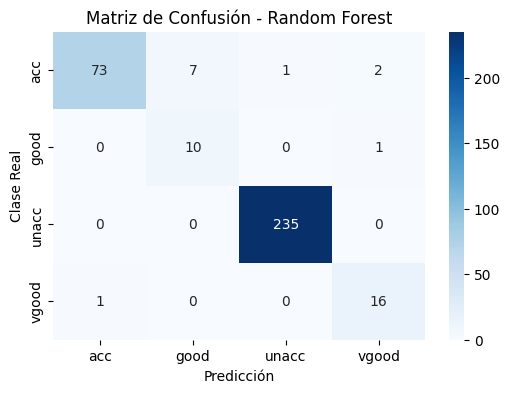

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicción')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión - Random Forest')
plt.show()


# Transfer Learning

In [ ]:
from sklearn.base import clone

print("\n=== Transfer Learning ===")


=== Transfer Learning ===


In [ ]:
# Paso 1: entrenar modelo base en una pequeña muestra
X_small, _, y_small, _ = train_test_split(X_train_resampled, y_train_resampled, train_size=0.3, random_state=42)
mlp_base = MLPClassifier(hidden_layer_sizes=(64, 32, 16), activation='relu', max_iter=500, random_state=42)
mlp_base.fit(X_small, y_small)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(64, 32, 16), max_iter=500, random_state=42)

In [ ]:
# Paso 2: clonar el modelo y hacer fine-tuning con todo el set
mlp_transfer = clone(mlp_base)
mlp_transfer.max_iter = 1000  # más iteraciones
mlp_transfer.warm_start = True  # continuar entrenamiento
mlp_transfer.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(64, 32, 16), max_iter=1000, random_state=42,
              warm_start=True)

In [ ]:
# Evaluar
y_pred_transfer = mlp_transfer.predict(X_test)
acc_transfer = accuracy_score(y_test, y_pred_transfer)
f1_transfer = f1_score(y_test, y_pred_transfer, average="weighted")
resultados.append(("Transfer Learning (MLP)", acc_transfer, f1_transfer))

In [ ]:
# ACTUALIZAR tabla de resultados
df_resultados = pd.DataFrame(resultados, columns=["Arquitectura", "Accuracy", "F1-Score"])
mejor_modelo = df_resultados["F1-Score"].astype(str).str.replace("**", "", regex=False).astype(float).idxmax()
df_resultados.loc[mejor_modelo, ["Accuracy", "F1-Score"]] = "**" + df_resultados.loc[mejor_modelo, ["Accuracy", "F1-Score"]].astype(str) + "**"

print("\nComparación de modelos:")
print(df_resultados.to_markdown(index=False))



Comparación de modelos:
| Arquitectura            | Accuracy               | F1-Score               |
|:------------------------|:-----------------------|:-----------------------|
| Random Forest           | 0.9653179190751445     | 0.9672081760554202     |
| MLP (3 capas ReLU)      | **0.9913294797687862** | **0.9914936056141486** |
| KNN                     | 0.7283236994219653     | 0.7644177594982179     |
| Transfer Learning (MLP) | 0.9913294797687862     | 0.9914936056141486     |


<ipython-input-23-b388891bee45>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '**0.9913294797687862**' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_resultados.loc[mejor_modelo, ["Accuracy", "F1-Score"]] = "**" + df_resultados.loc[mejor_modelo, ["Accuracy", "F1-Score"]].astype(str) + "**"
<ipython-input-23-b388891bee45>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '**0.9914936056141486**' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_resultados.loc[mejor_modelo, ["Accuracy", "F1-Score"]] = "**" + df_resultados.loc[mejor_modelo, ["Accuracy", "F1-Score"]].astype(str) + "**"


#Graficas

## GRAFICA 1: Comparación de modelos

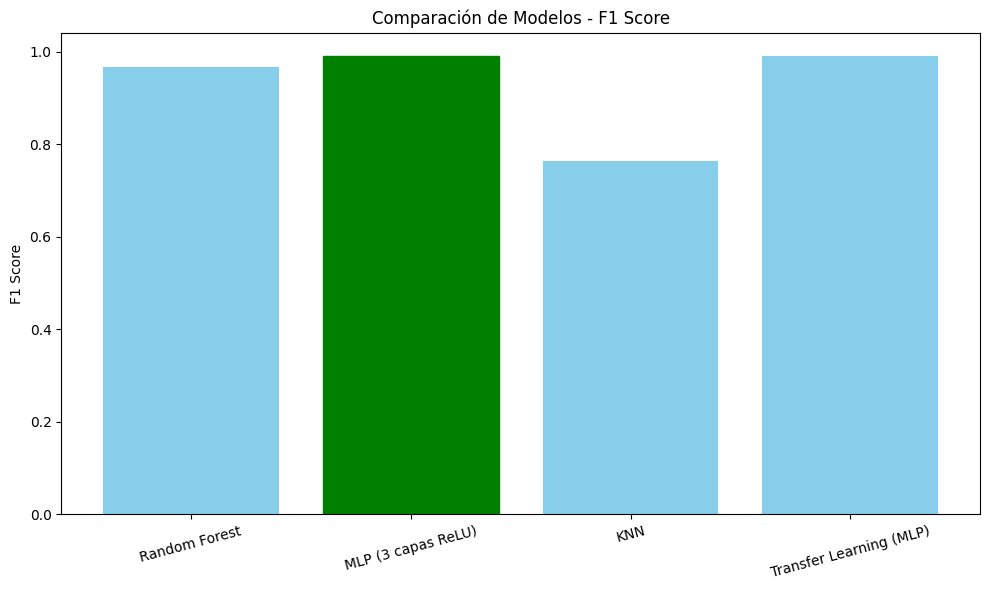

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.bar(df_resultados["Arquitectura"], df_resultados["F1-Score"].astype(str).str.replace("**", "").astype(float), color='skyblue')
bars[mejor_modelo].set_color('green')
plt.title("Comparación de Modelos - F1 Score")
plt.ylabel("F1 Score")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

##Matriz de confusion para todos los modelos

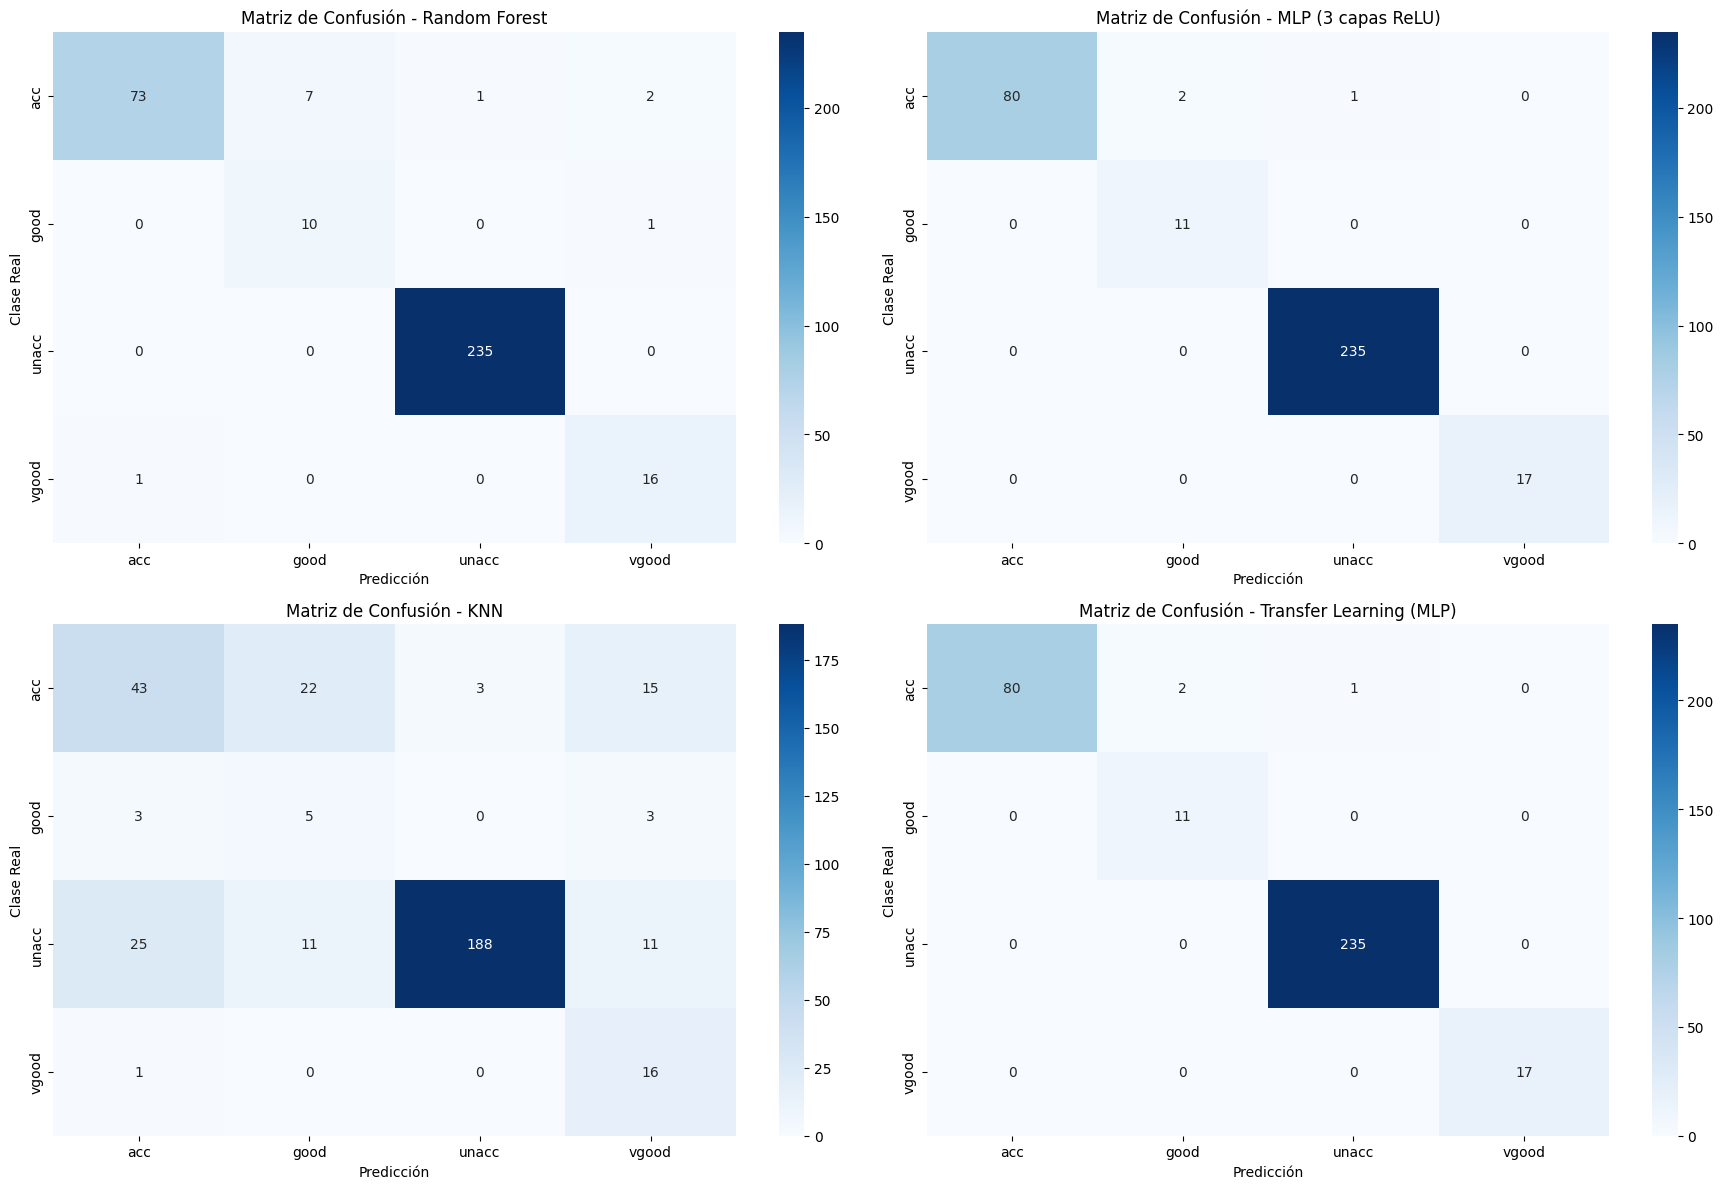

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de modelos y sus predicciones
modelos = [
    ("Random Forest", rf, y_pred_rf),
    ("MLP (3 capas ReLU)", mlp, y_pred_mlp),
    ("KNN", knn, y_pred_knn),
    ("Transfer Learning (MLP)", mlp_transfer, y_pred_transfer)
]

# Mostrar las matrices de confusión
plt.figure(figsize=(18, 12))

for i, (nombre, modelo, y_pred) in enumerate(modelos, 1):
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=modelo.classes_, yticklabels=modelo.classes_)
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.xlabel("Predicción")
    plt.ylabel("Clase Real")

plt.tight_layout()
plt.show()


## GRAFICA 3: Matriz de confusión del mejor modelo

In [ ]:
mejor_modelo_nombre = df_resultados.iloc[mejor_modelo]["Arquitectura"]
if "Random Forest" in mejor_modelo_nombre:
    y_best_pred = y_pred_rf
    best_model = rf
elif "MLP" in mejor_modelo_nombre and "Transfer" not in mejor_modelo_nombre:
    y_best_pred = y_pred_mlp
    best_model = mlp
elif "KNN" in mejor_modelo_nombre:
    y_best_pred = y_pred_knn
    best_model = knn
else:
    y_best_pred = y_pred_transfer
    best_model = mlp_transfer

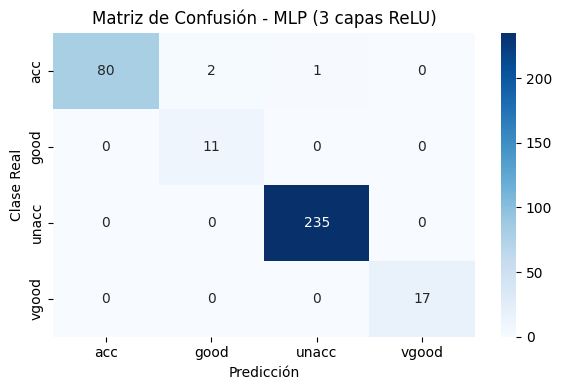

In [ ]:
cm = confusion_matrix(y_test, y_best_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicción')
plt.ylabel('Clase Real')
plt.title(f'Matriz de Confusión - {mejor_modelo_nombre}')
plt.tight_layout()
plt.show()